In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [10]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2_chi.csv')
data.head()

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Area_of_Residence,Transfusion_Status,Splenectomy_Status,General_Health,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,1,2,1,0,0,50,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,1,2,1,0,0,75,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,1,2,0,0,0,65,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,1,1,0,0,0,60,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,1,2,1,0,1,40,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [11]:
data

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Area_of_Residence,Transfusion_Status,Splenectomy_Status,General_Health,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,1,2,1,0,0,50,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,1,2,1,0,0,75,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,1,2,0,0,0,65,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,1,1,0,0,0,60,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,1,2,1,0,1,40,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,12,0,1,0,0,0,1,65,65,0,67.5,35,48,100.0,20.0,50.2,50.4,0
352,12,1,1,1,1,0,1,65,65,0,35.0,40,64,100.0,20.0,46.3,50.2,0
353,13,0,1,2,1,0,1,60,100,100,77.5,45,68,100.0,20.0,63.5,61.4,0
354,17,0,1,2,0,0,0,40,35,0,45.0,30,56,100.0,20.0,43.7,46.8,1


In [12]:
# Split features and target
X = data.drop('Mental_Health_Status', axis=1)
y = data['Mental_Health_Status']

# Display the encoded dataset
print(X)
print(y)

     Age_of_Participants  Gender  Marital_Status  Type_of_Family  \
0                     15       0               1               2   
1                     18       1               1               2   
2                     13       0               1               2   
3                     14       0               1               1   
4                     13       1               1               2   
..                   ...     ...             ...             ...   
351                   12       0               1               0   
352                   12       1               1               1   
353                   13       0               1               2   
354                   17       0               1               2   
355                   12       0               1               2   

     Area_of_Residence  Transfusion_Status  Splenectomy_Status  \
0                    1                   0                   0   
1                    1                   0         

In [14]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Accuracy : 0.9305555555555556
Precision : 0.9411764705882353
Recall : 0.8
F1-Score : 0.8648648648648649

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.94      0.80      0.86        20

    accuracy                           0.93        72
   macro avg       0.93      0.89      0.91        72
weighted avg       0.93      0.93      0.93        72



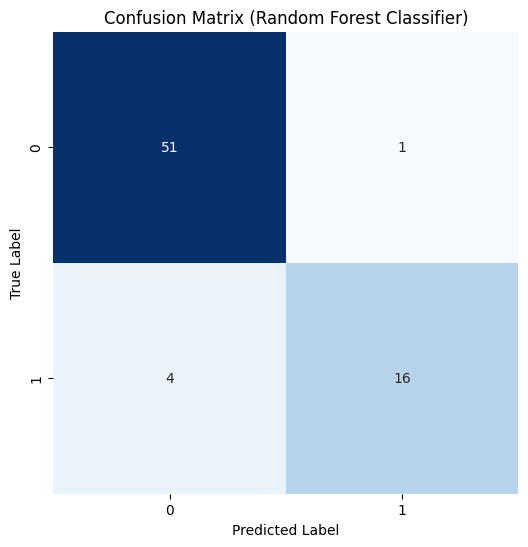

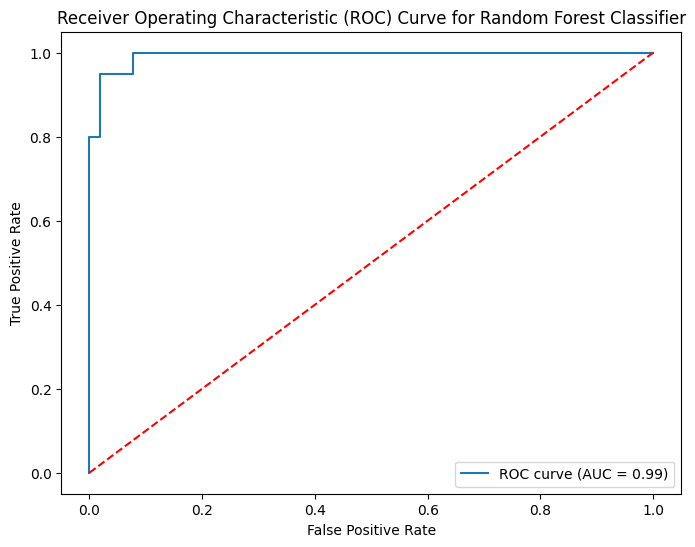

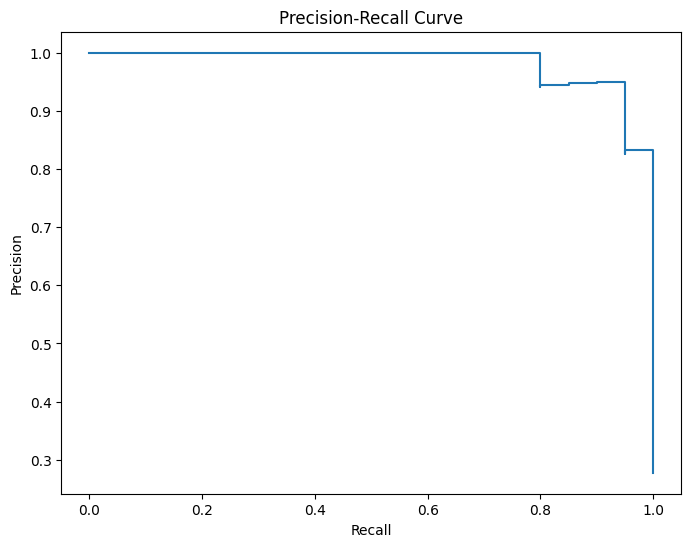

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.85
F1-Score: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.94      0.85      0.89        20

    accuracy                           0.94        72
   macro avg       0.94      0.92      0.93        72
weighted avg       0.94      0.94      0.94        72



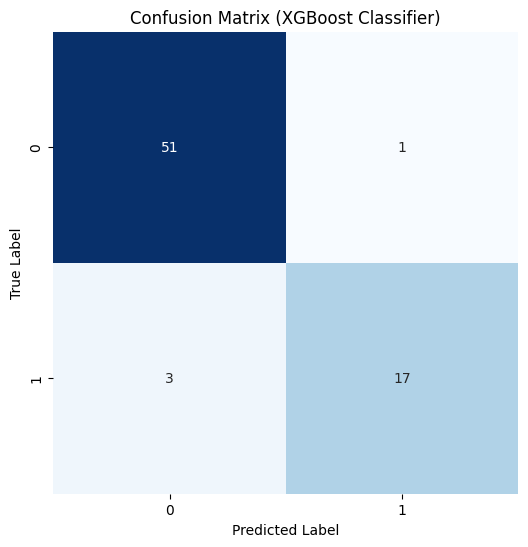

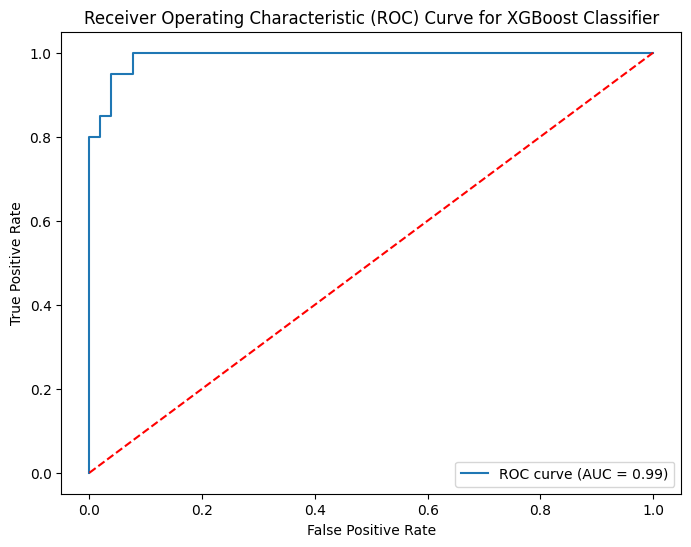

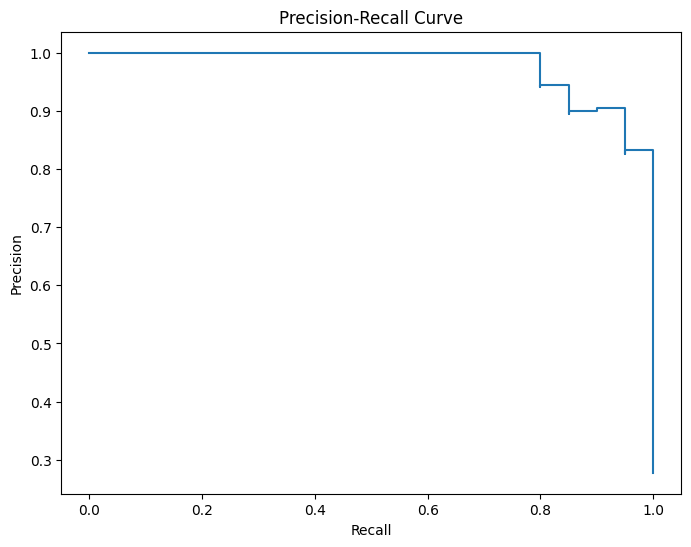

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.85
F1-Score: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.94      0.85      0.89        20

    accuracy                           0.94        72
   macro avg       0.94      0.92      0.93        72
weighted avg       0.94      0.94      0.94        72



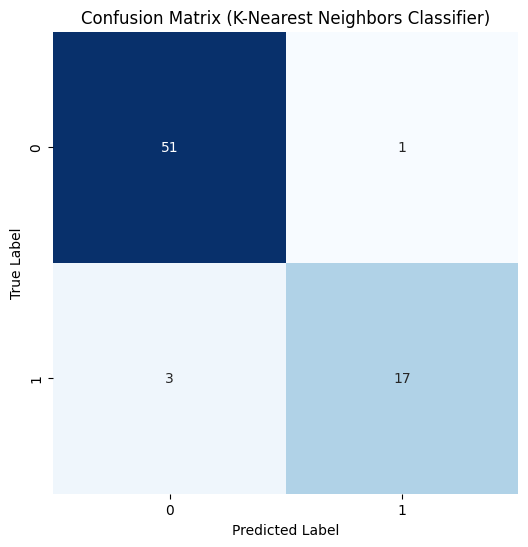

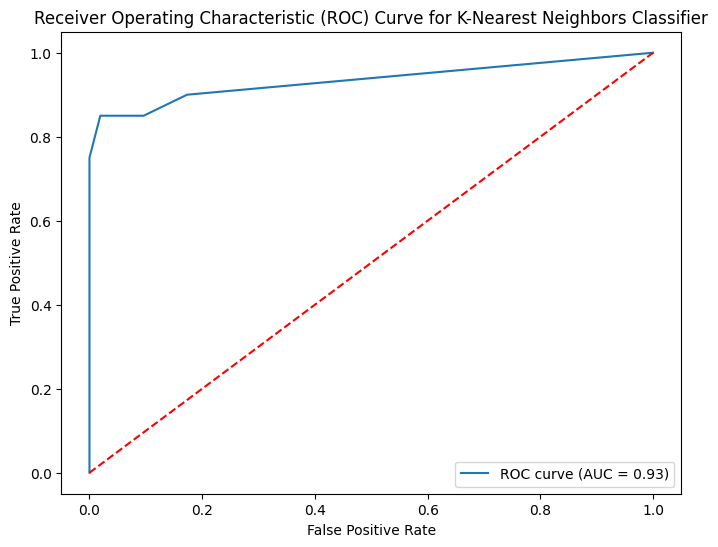

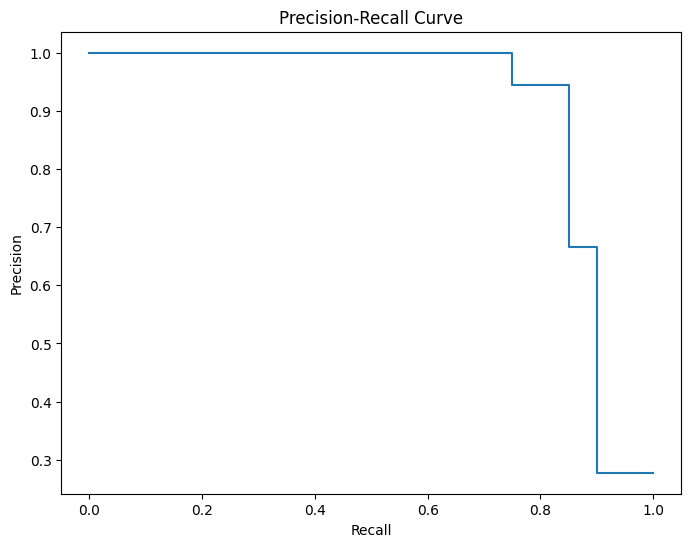

In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (K-Nearest Neighbors Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = knn_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for K-Nearest Neighbors Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.85
F1-Score: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.94      0.85      0.89        20

    accuracy                           0.94        72
   macro avg       0.94      0.92      0.93        72
weighted avg       0.94      0.94      0.94        72



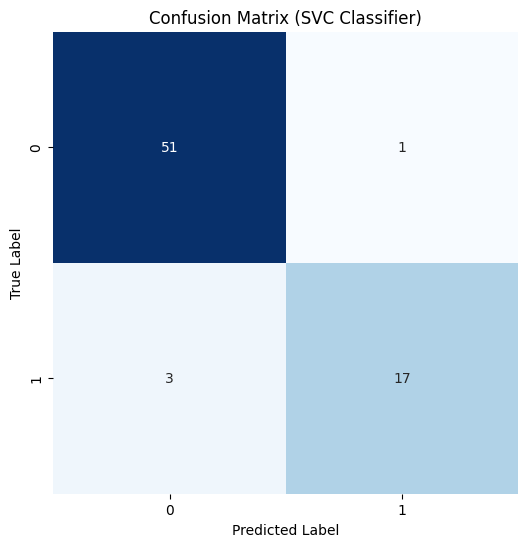

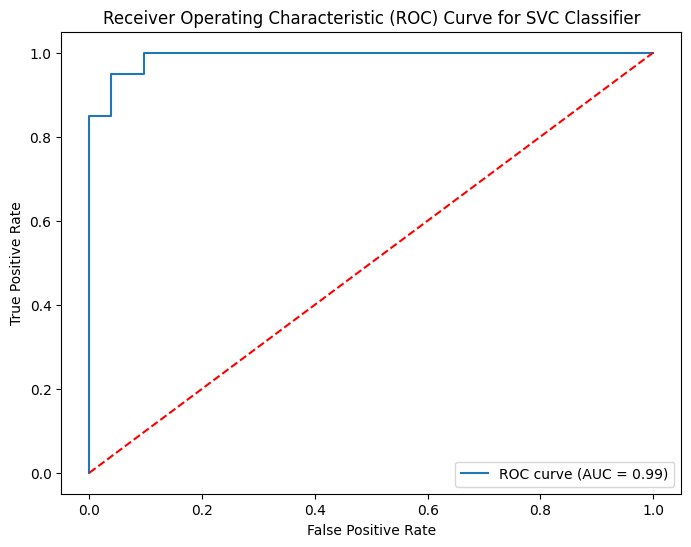

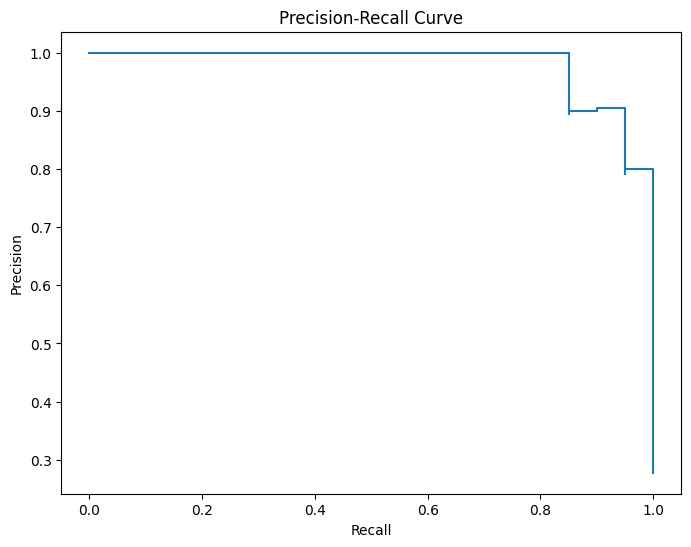

In [18]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the Support Vector Classifier
svc_classifier = SVC(probability=True, random_state=42)  # Set probability=True to enable predict_proba

# Train the model
svc_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVC Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = svc_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.9722222222222222
Precision: 1.0
Recall: 0.9
F1-Score: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.90      0.95        20

    accuracy                           0.97        72
   macro avg       0.98      0.95      0.96        72
weighted avg       0.97      0.97      0.97        72



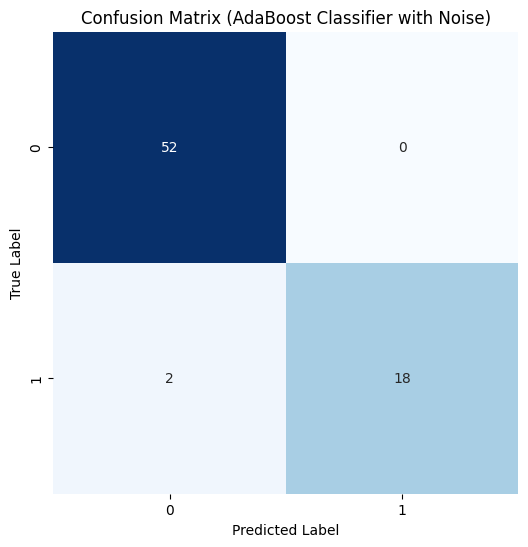

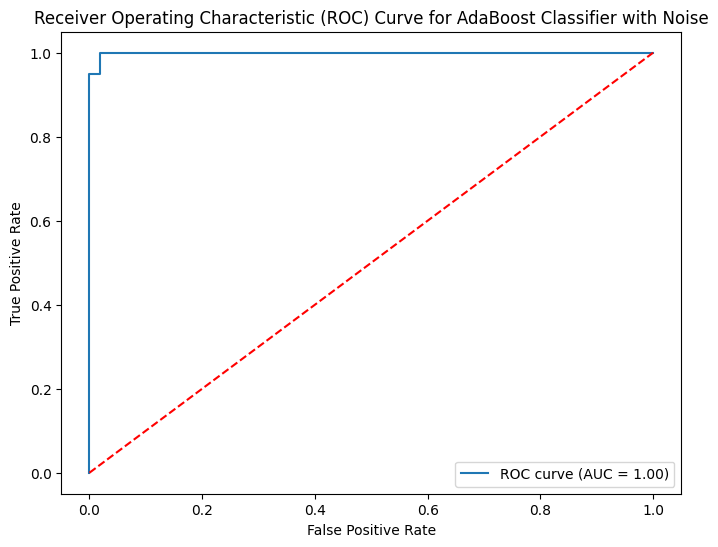

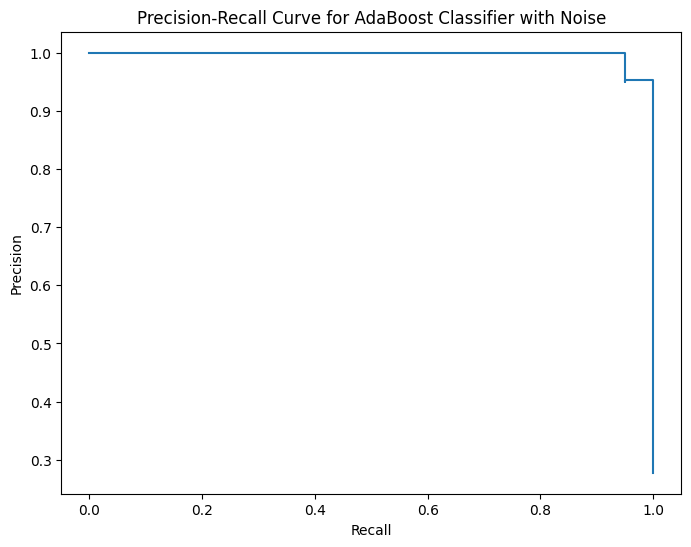

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [20]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=a9663f37ddbd208b23dbffec844eefb8ac82bb082778052d7ccc007c4ccf3b17
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


Stopping search: maximum iterations reached --> 20

Accuracy: 0.9583333333333334
Precision: 0.9473684210526315
Recall: 0.9
F1-Score: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.95      0.90      0.92        20

    accuracy                           0.96        72
   macro avg       0.95      0.94      0.95        72
weighted avg       0.96      0.96      0.96        72



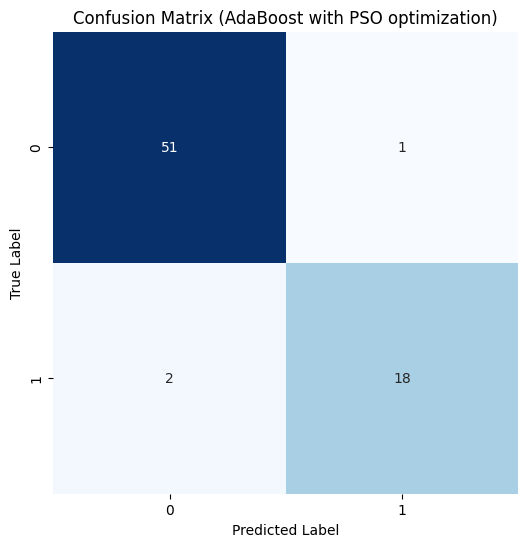

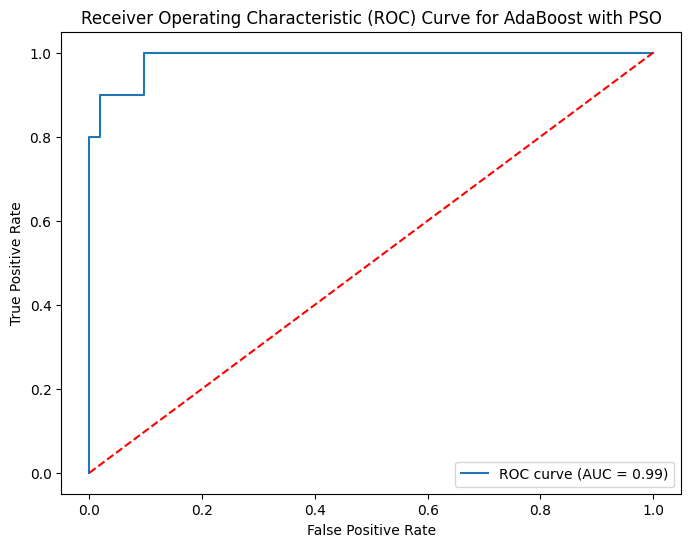

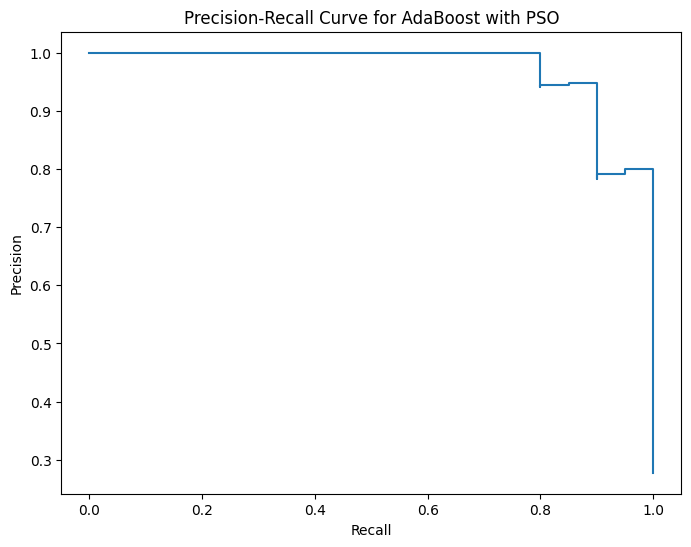

In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate

    # Initialize the AdaBoost classifier with the given parameters
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    # Train the model
    adaboost_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred = adaboost_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate)
lb = [10, 0.01]  # Lower bounds for [n_estimators, learning_rate]
ub = [200, 1.0]  # Upper bounds for [n_estimators, learning_rate]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]

# Train the AdaBoost classifier with the optimized hyperparameters
adaboost_classifier = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost with PSO optimization)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost with PSO')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost with PSO')
plt.show()


[LightGBM] [Info] Number of positive: 70, number of negative: 157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 227, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308370 -> initscore=-0.807751
[LightGBM] [Info] Start training from score -0.807751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


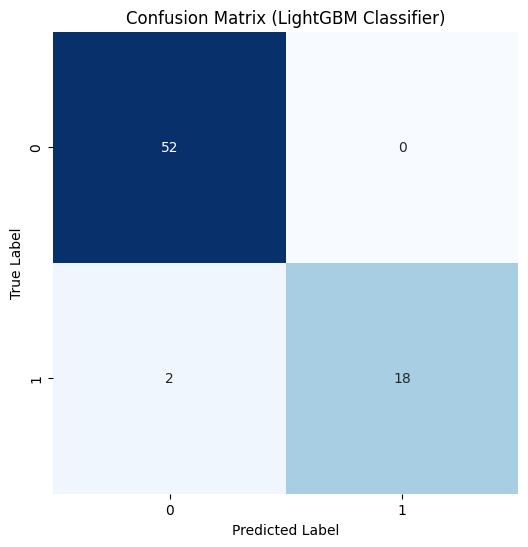

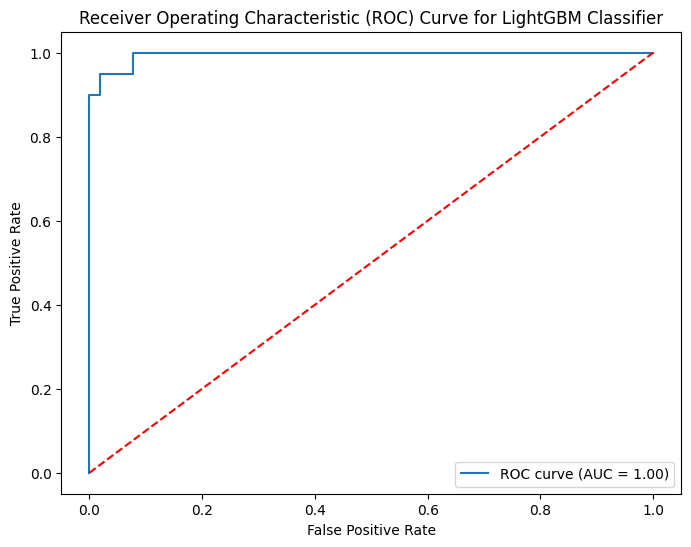

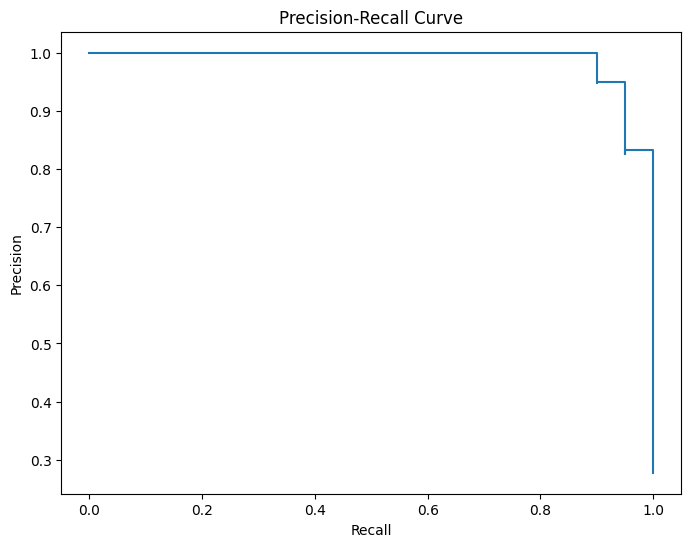

In [22]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Train the model
lgbm_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LightGBM Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there ar

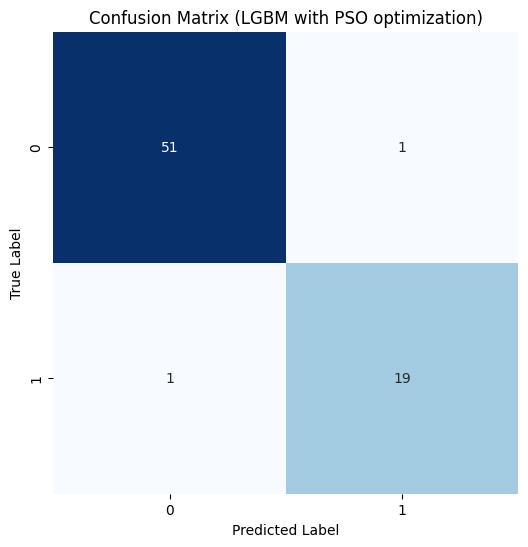

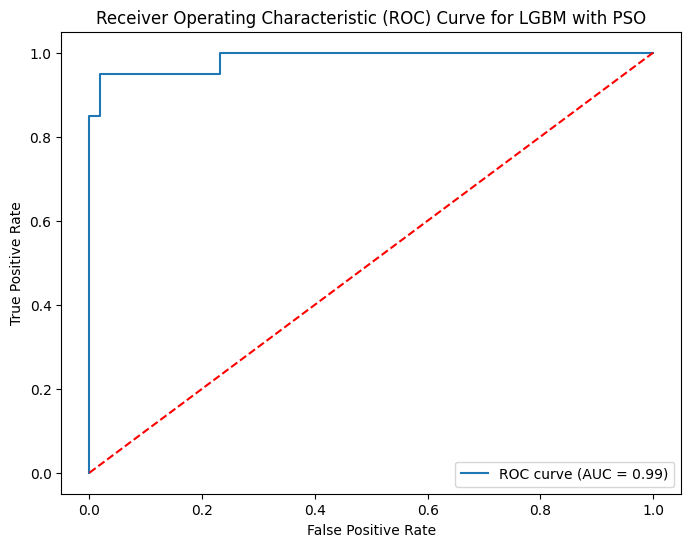

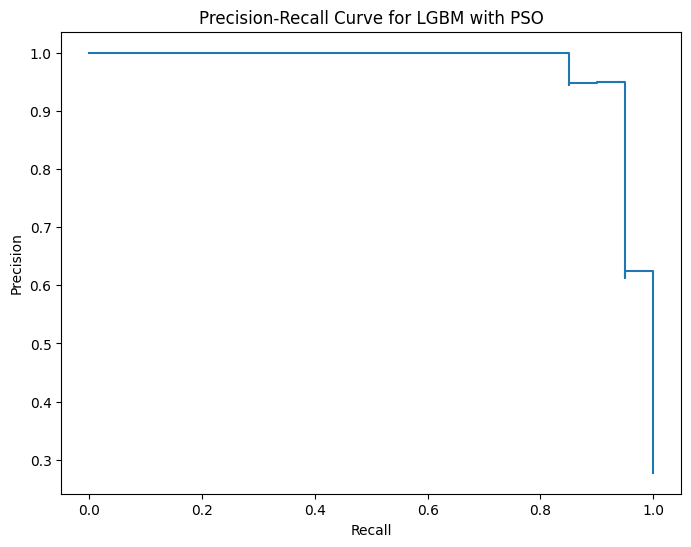

In [33]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate
    max_depth = int(params[2])     # Maximum depth of trees

    # Initialize the LGBM classifier with the given parameters
    lgbm_classifier = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model
    lgbm_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred = lgbm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate, max_depth)
lb = [10, 0.01, 3]  # Lower bounds for [n_estimators, learning_rate, max_depth]
ub = [200, 1.0, 15]  # Upper bounds for [n_estimators, learning_rate, max_depth]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]
best_max_depth = int(best_params[2])

# Train the LGBM classifier with the optimized hyperparameters
lgbm_classifier = LGBMClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)
lgbm_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LGBM with PSO optimization)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM with PSO')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGBM with PSO')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3583 - loss: 8.8057 - val_accuracy: 0.7083 - val_loss: 3.1256
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6854 - loss: 3.6336 - val_accuracy: 0.7222 - val_loss: 1.8212
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6192 - loss: 2.0502 - val_accuracy: 0.6528 - val_loss: 1.4404
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6857 - loss: 1.3515 - val_accuracy: 0.7778 - val_loss: 1.2589
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7346 - loss: 1.1637 - val_accuracy: 0.7917 - val_loss: 0.7950
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7485 - loss: 0.7068 - val_accuracy: 0.8194 - val_loss: 0.5422
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7858 - loss: 0.5102 - val_accuracy: 0.8333 - val_loss: 0.4392
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8659 - loss: 0.4121 - val_accuracy: 0.8194 - val_loss: 0.3911
Epoc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Accuracy: 0.8888888888888888
Precision: 0.875
Recall: 0.7
F1-Score: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        52
           1       0.88      0.70      0.78        20

    accuracy                           0.89        72
   macro avg       0.88      0.83      0.85        72
weighted avg       0.89      0.89      0.88        72



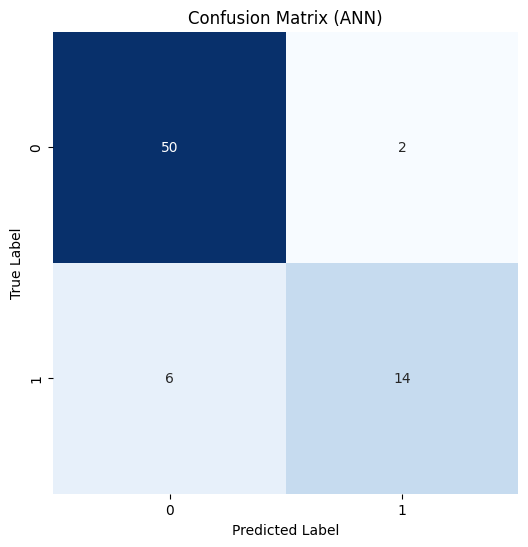

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


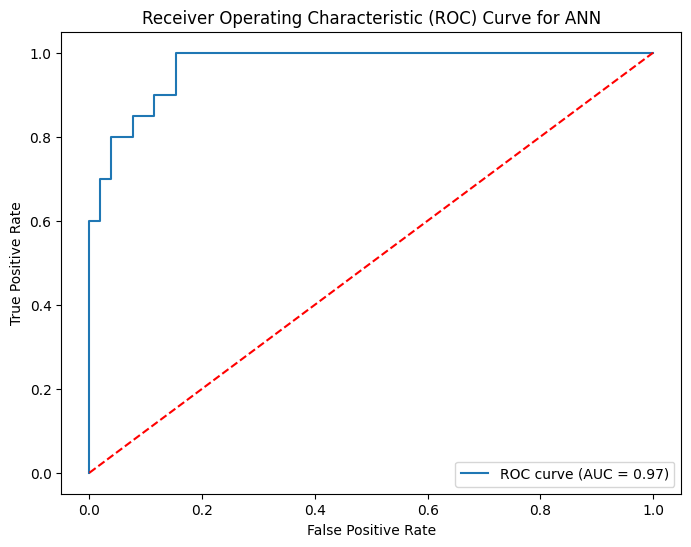

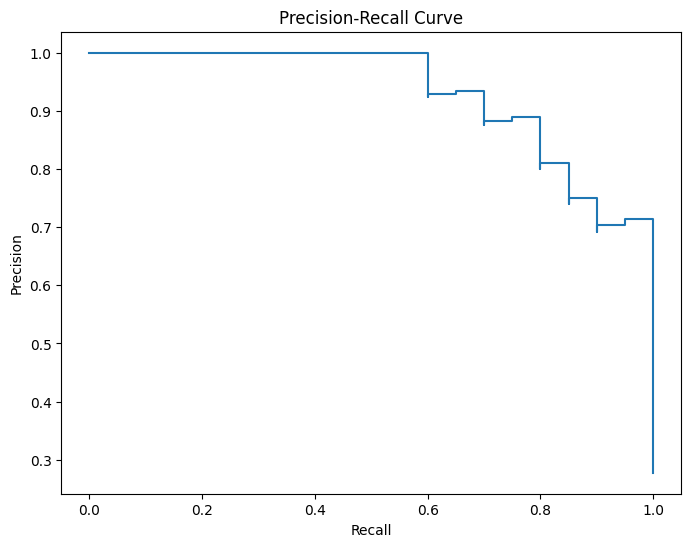

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (ANN)')
plt.show()

# Calculate ROC curve and AUC for binary classification
y_pred_probs = model.predict(X_test).flatten()
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.4268 - loss: 4.8351 - val_accuracy: 0.7222 - val_loss: 2.1829
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7050 - loss: 1.5794 - val_accuracy: 0.6528 - val_loss: 0.8769
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6871 - loss: 0.8664 - val_accuracy: 0.8056 - val_loss: 0.5375
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8310 - loss: 0.4563 - val_accuracy: 0.7917 - val_loss: 0.5231
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.8289 - loss: 0.4171 - val_accuracy: 0.8472 - val_loss: 0.4179
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8120 - loss: 0.3936 - val_accuracy: 0.8194 - val_loss: 0.3739
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.3261 - val_accuracy: 0.8333 - val_loss: 0.3251
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8818 - loss: 0.2812 - val_accuracy: 0.8611 - val_loss: 0.3038
Ep

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Accuracy: 0.9027777777777778
Precision: 0.8823529411764706
Recall: 0.75
F1-Score: 0.8108108108108109

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.88      0.75      0.81        20

    accuracy                           0.90        72
   macro avg       0.90      0.86      0.87        72
weighted avg       0.90      0.90      0.90        72



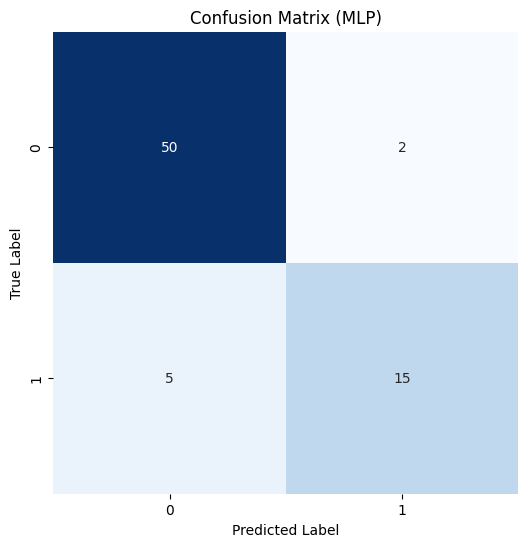

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


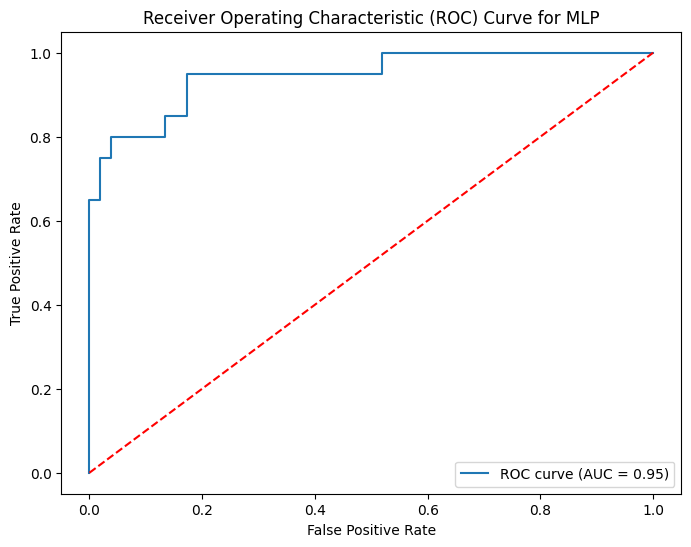

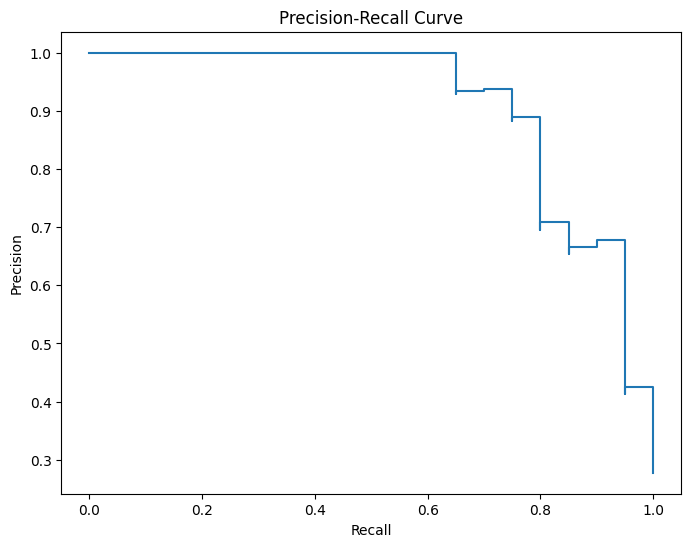

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP)')
plt.show()

# Calculate ROC curve and AUC for binary classification
y_pred_probs = model.predict(X_test).flatten()
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**SMOTE**


Accuracy : 0.9027777777777778
Precision : 0.8823529411764706
Recall : 0.75
F1-Score : 0.8108108108108109

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.88      0.75      0.81        20

    accuracy                           0.90        72
   macro avg       0.90      0.86      0.87        72
weighted avg       0.90      0.90      0.90        72



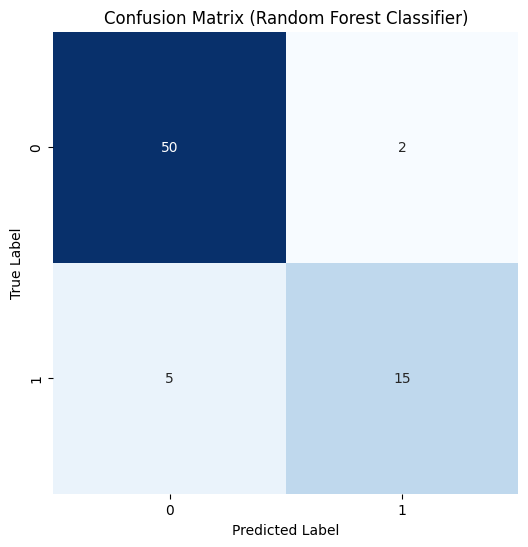

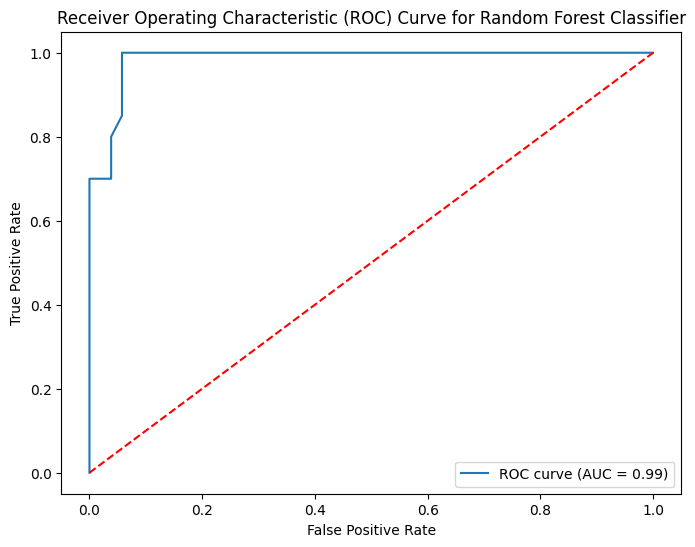

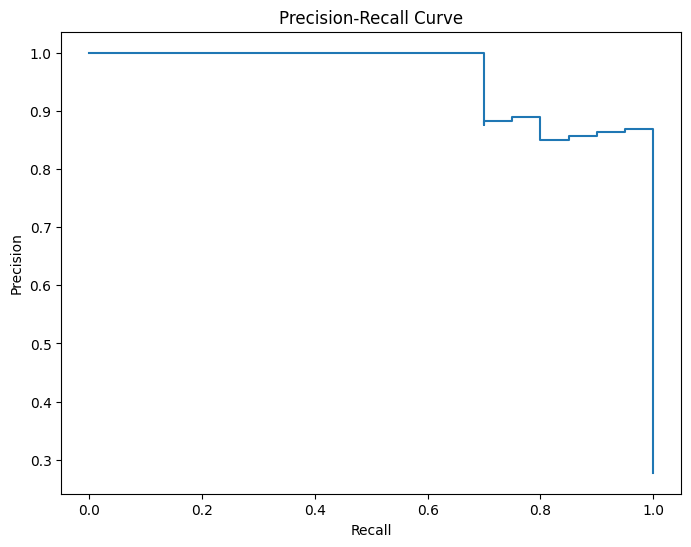

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model with the resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy : 0.9722222222222222
Precision : 0.95
Recall : 0.95
F1-Score : 0.95

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.95      0.95      0.95        20

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:33:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


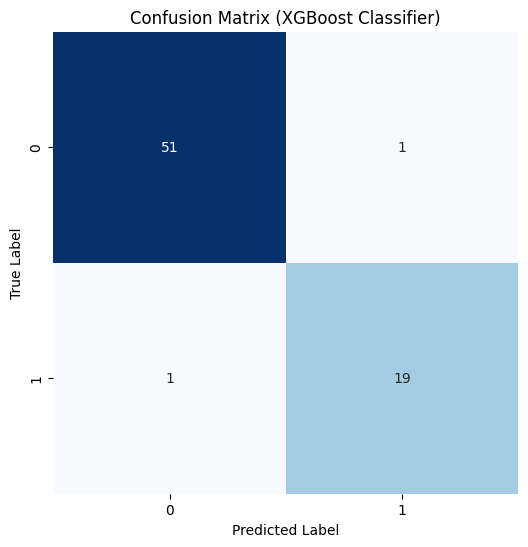

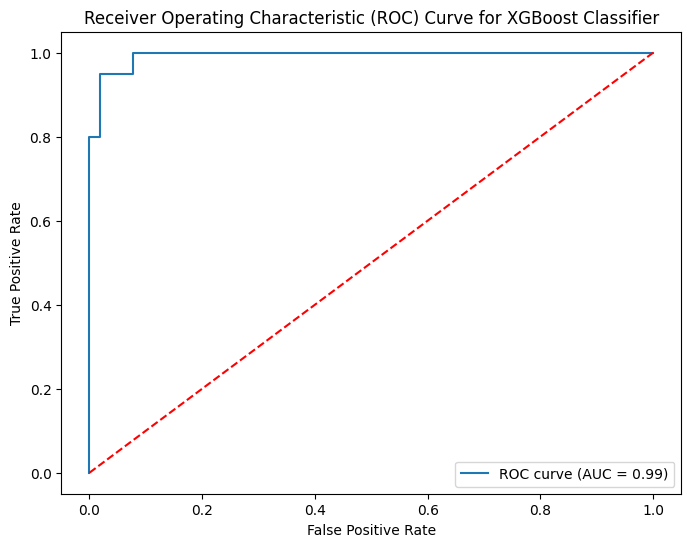

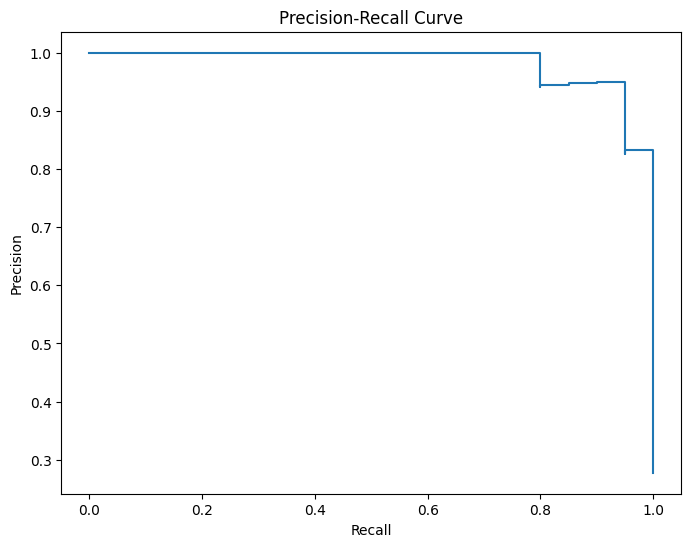

In [48]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model with the resampled data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy : 0.9027777777777778
Precision : 0.782608695652174
Recall : 0.9
F1-Score : 0.8372093023255814

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.78      0.90      0.84        20

    accuracy                           0.90        72
   macro avg       0.87      0.90      0.88        72
weighted avg       0.91      0.90      0.90        72



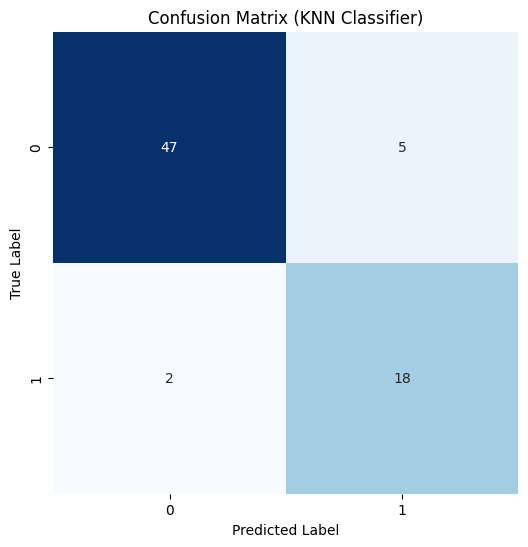

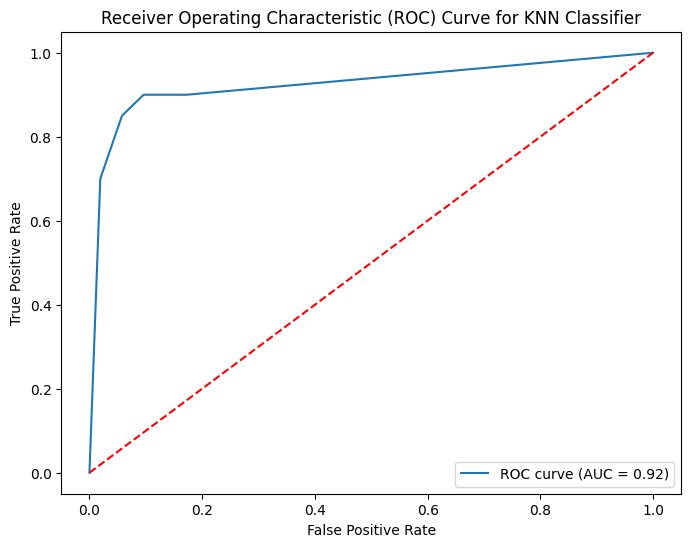

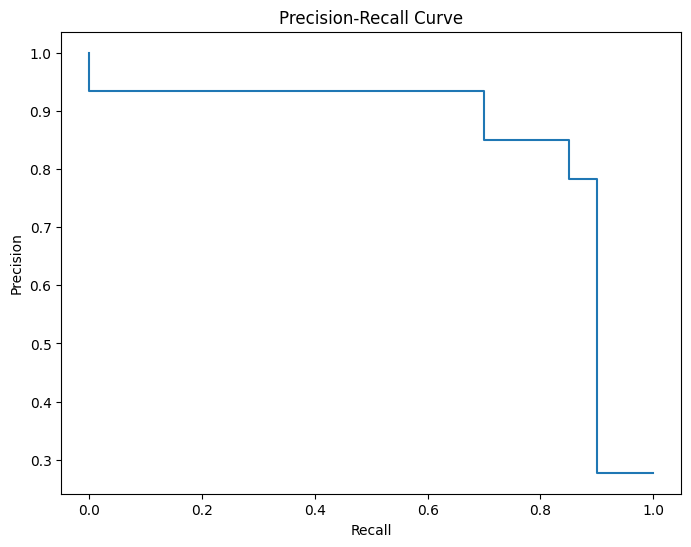

In [49]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  # Import KNN classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors

# Train the model with the resampled data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = knn_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy : 0.9583333333333334
Precision : 0.9473684210526315
Recall : 0.9
F1-Score : 0.9230769230769231

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.95      0.90      0.92        20

    accuracy                           0.96        72
   macro avg       0.95      0.94      0.95        72
weighted avg       0.96      0.96      0.96        72



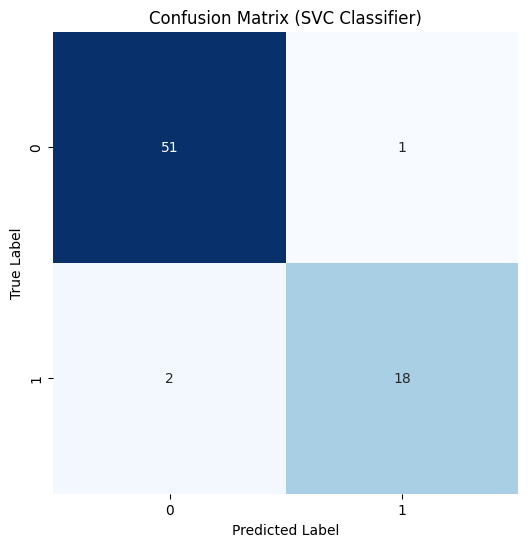

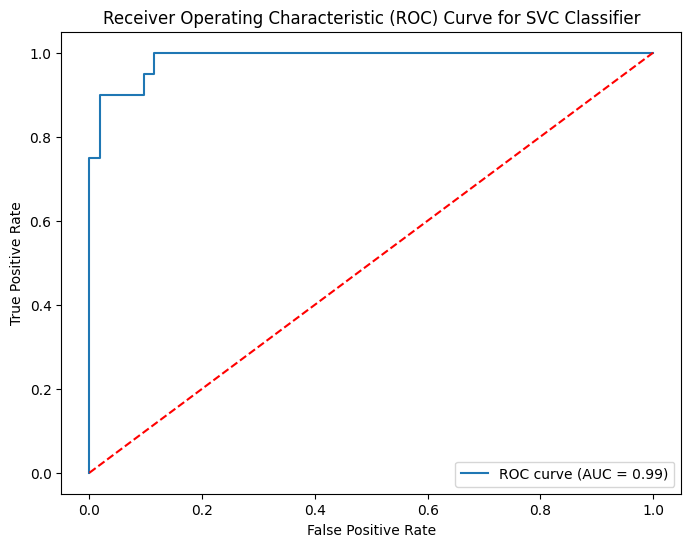

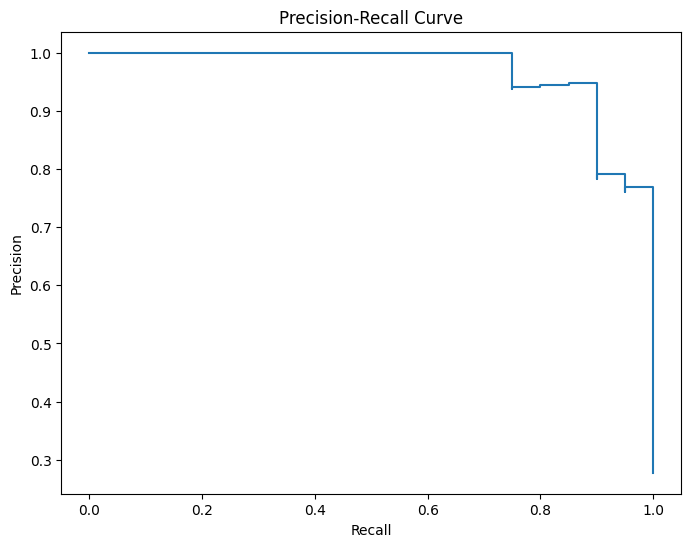

In [50]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  # Import SVC classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the SVC classifier with a radial basis function (RBF) kernel
svc_classifier = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model with the resampled data
svc_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVC Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = svc_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy : 0.9722222222222222
Precision : 1.0
Recall : 0.9
F1-Score : 0.9473684210526315

Classification Report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.90      0.95        20

    accuracy                           0.97        72
   macro avg       0.98      0.95      0.96        72
weighted avg       0.97      0.97      0.97        72



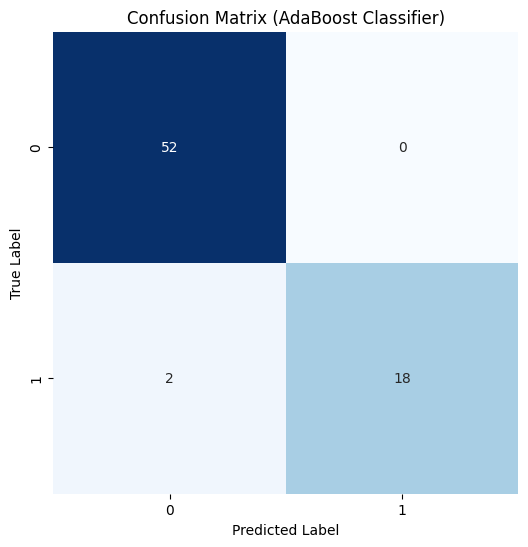

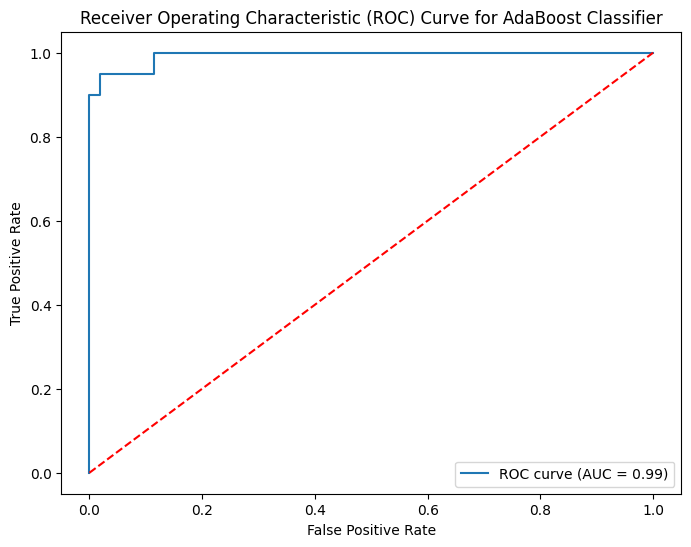

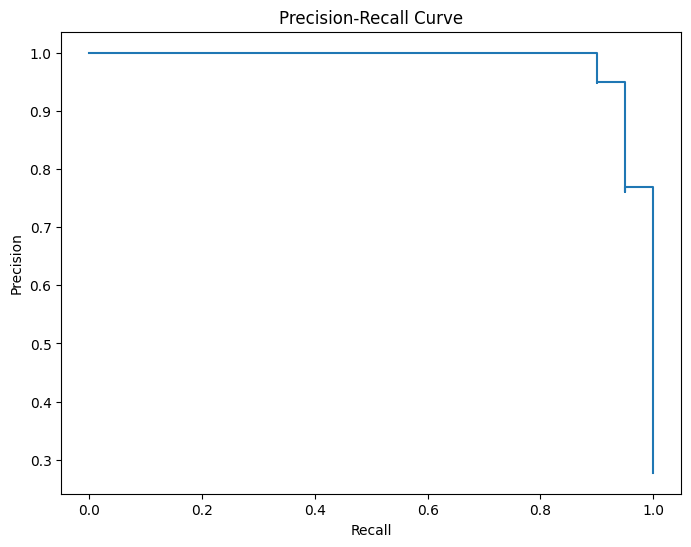

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the AdaBoost classifier with a decision tree base estimator
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model with the resampled data
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Stopping search: maximum iterations reached --> 20

Accuracy: 0.9722222222222222
Precision: 0.95
Recall: 0.95
F1-Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.95      0.95      0.95        20

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



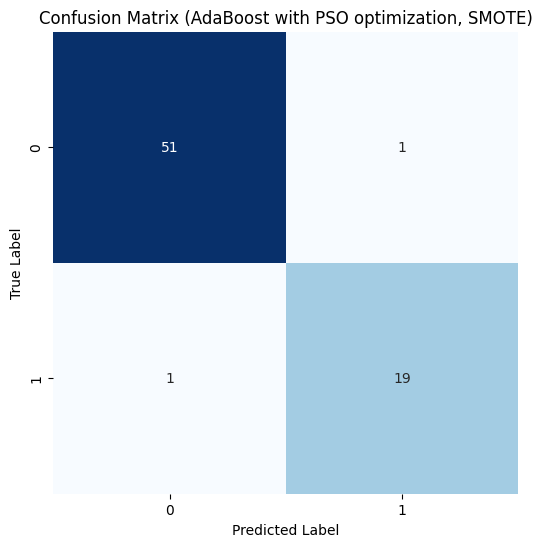

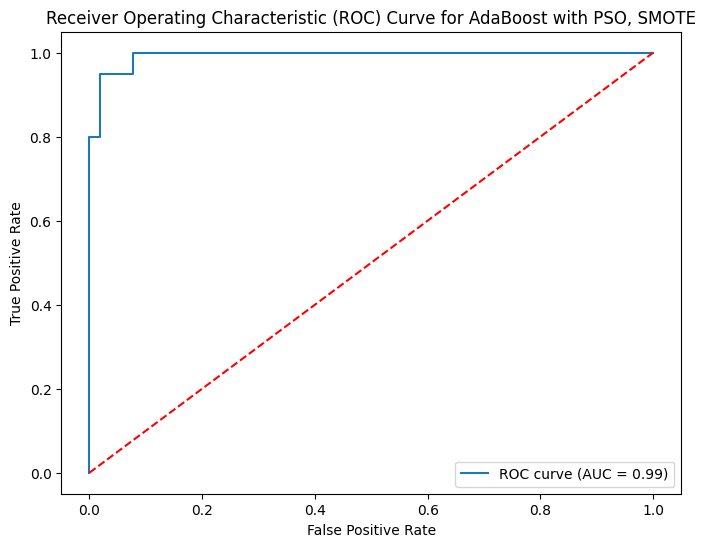

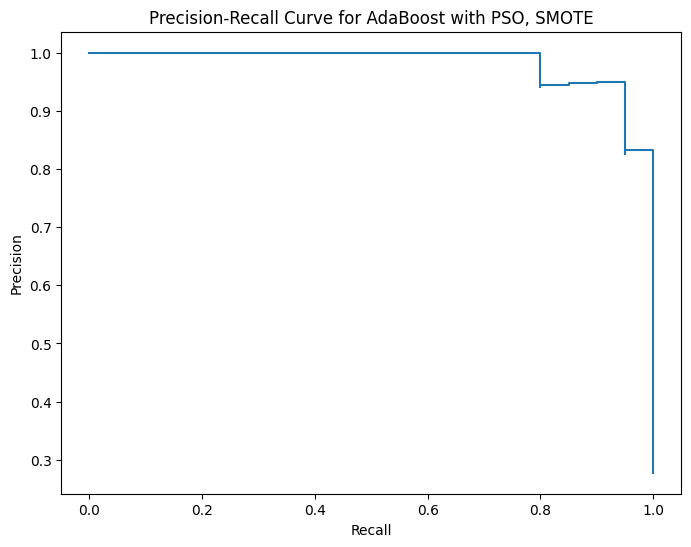

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate

    # Initialize the AdaBoost classifier with the given parameters
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    # Train the model on the resampled data
    adaboost_classifier.fit(X_train_resampled, y_train_resampled)

    # Evaluate on test set
    y_test_pred = adaboost_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate)
lb = [10, 0.01]  # Lower bounds for [n_estimators, learning_rate]
ub = [200, 1.0]  # Upper bounds for [n_estimators, learning_rate]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]

# Train the AdaBoost classifier with the optimized hyperparameters
adaboost_classifier = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost with PSO optimization and SMOTE)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost with PSO and SMOTE')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost with PSO and SMOTE')
plt.show()


[LightGBM] [Info] Number of positive: 157, number of negative: 157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 314, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

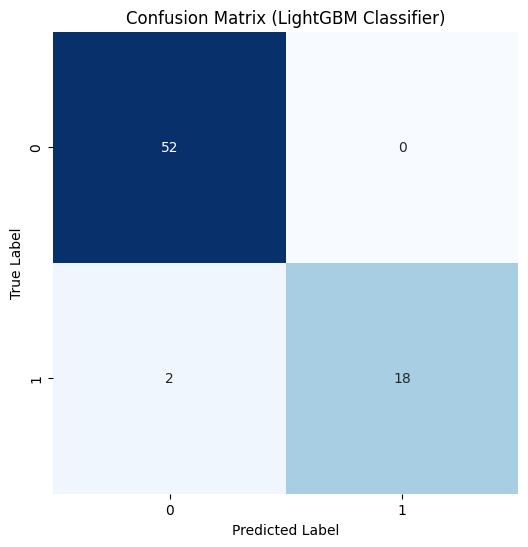

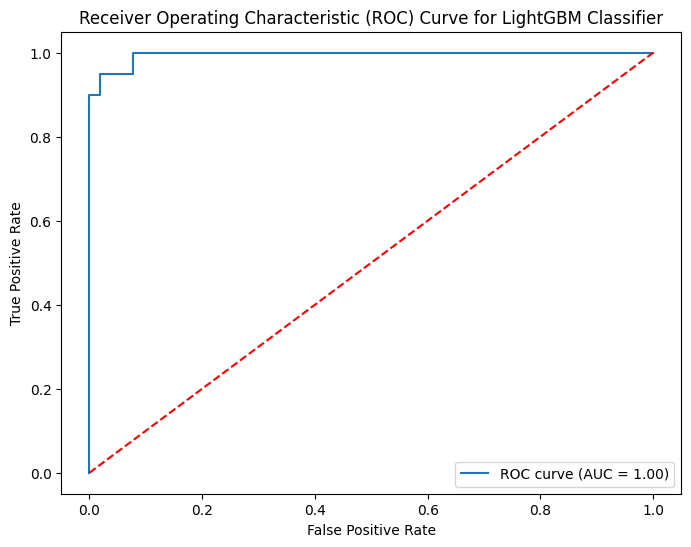

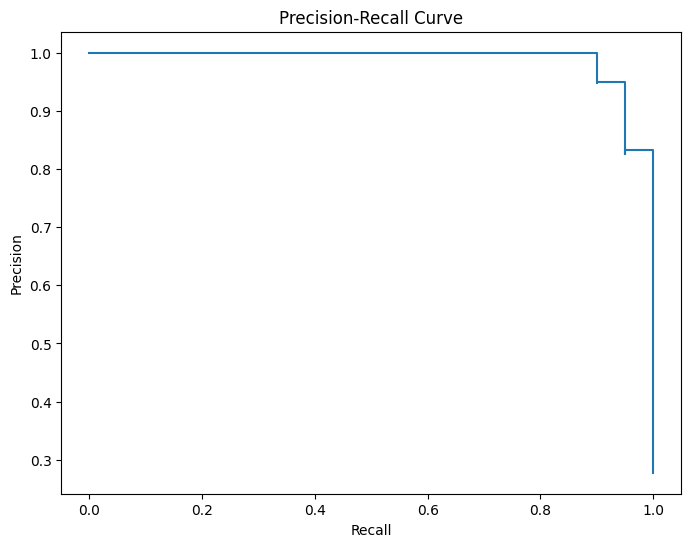

In [56]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier  # Import LightGBM classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Train the model with the resampled data
lgbm_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LightGBM Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

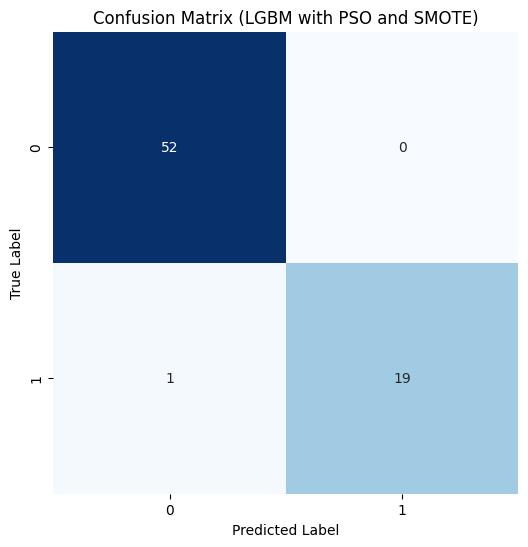

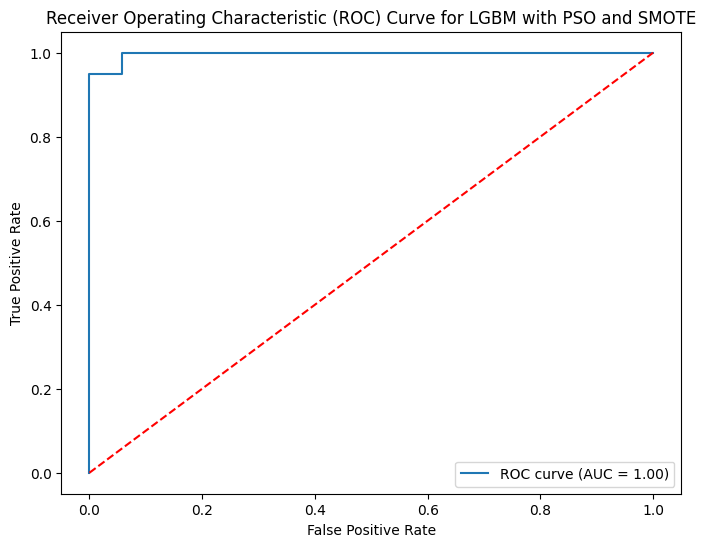

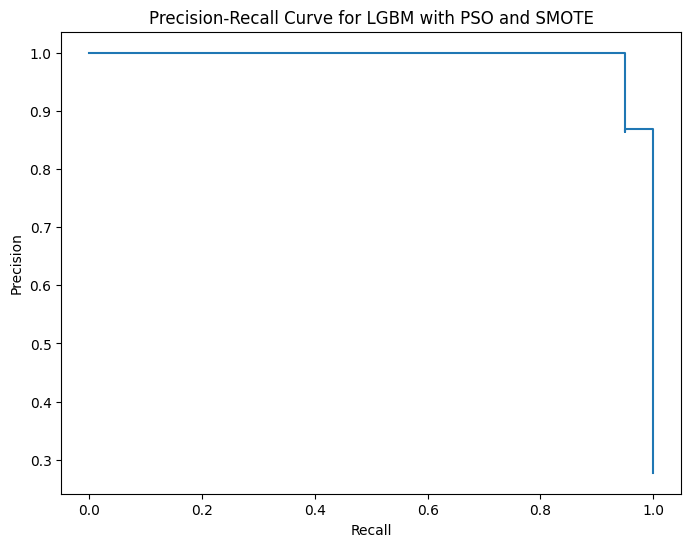

In [57]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate
    max_depth = int(params[2])     # Maximum depth of trees

    # Initialize the LGBM classifier with the given parameters
    lgbm_classifier = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model on resampled training data
    lgbm_classifier.fit(X_train_res, y_train_res)

    # Evaluate on test set
    y_test_pred = lgbm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate, max_depth)
lb = [10, 0.01, 3]  # Lower bounds for [n_estimators, learning_rate, max_depth]
ub = [200, 1.0, 15]  # Upper bounds for [n_estimators, learning_rate, max_depth]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]
best_max_depth = int(best_params[2])

# Train the LGBM classifier with the optimized hyperparameters
lgbm_classifier = LGBMClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)
lgbm_classifier.fit(X_train_res, y_train_res)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LGBM with PSO and SMOTE)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM with PSO and SMOTE')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGBM with PSO and SMOTE')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5376 - loss: 5.3261 - val_accuracy: 0.6528 - val_loss: 2.2759
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6508 - loss: 2.1335 - val_accuracy: 0.8194 - val_loss: 0.6687
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6905 - loss: 1.2580 - val_accuracy: 0.7778 - val_loss: 0.7803
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7236 - loss: 0.7589 - val_accuracy: 0.8194 - val_loss: 0.6084
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7753 - loss: 0.5422 - val_accuracy: 0.8194 - val_loss: 0.4382
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8265 - loss: 0.5300 - val_accuracy: 0.8611 - val_loss: 0.4625
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8227 - loss: 0.4900 - val_accuracy: 0.7500 - val_loss: 0.7084
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8664 - loss: 0.3546 - val_accuracy: 0.8472 - val_l

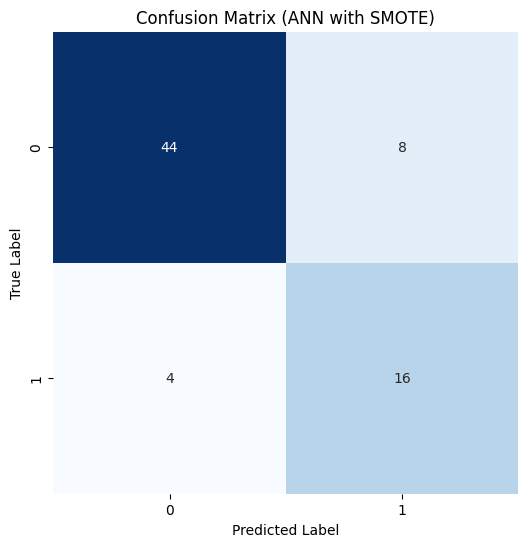

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


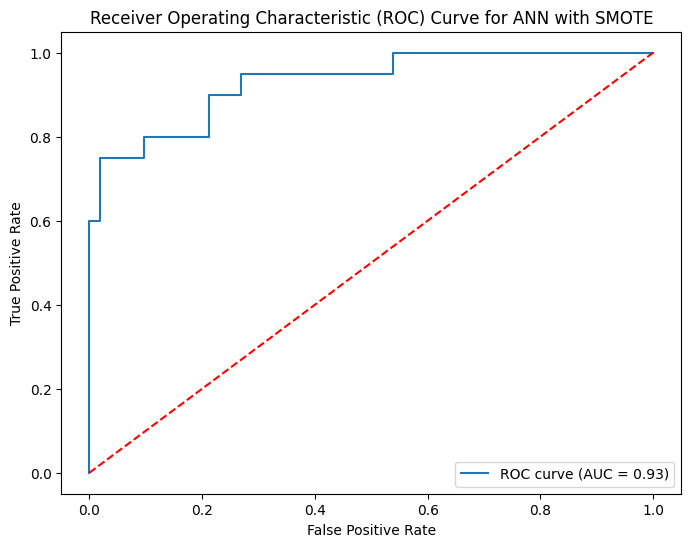

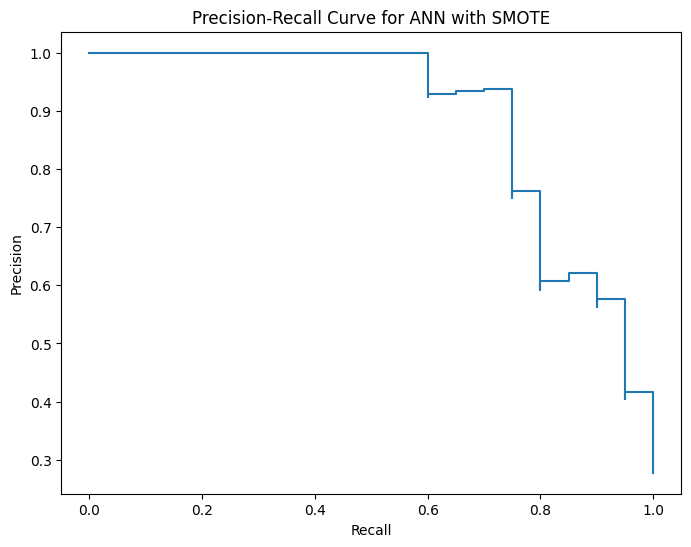

In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (ANN with SMOTE)')
plt.show()

# Calculate ROC curve and AUC for binary classification
y_pred_probs = model.predict(X_test).flatten()
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN with SMOTE')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for ANN with SMOTE')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4880 - loss: 2.0622 - val_accuracy: 0.7570 - val_loss: 0.8154
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8201 - loss: 0.7512 - val_accuracy: 0.8972 - val_loss: 0.4009
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8459 - loss: 0.5106 - val_accuracy: 0.8224 - val_loss: 0.4141
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8748 - loss: 0.3444 - val_accuracy: 0.8505 - val_loss: 0.4311
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8866 - loss: 0.3557 - val_accuracy: 0.8411 - val_loss: 0.4817
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8311 - loss: 0.4539 - val_accuracy: 0.8879 - val_loss: 0.3134
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9063 - loss: 0.2575 - val_accuracy: 0.8411 - val_loss: 0.4131
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9143 - loss: 0.2279 - val_accuracy: 0.8411 - val_l

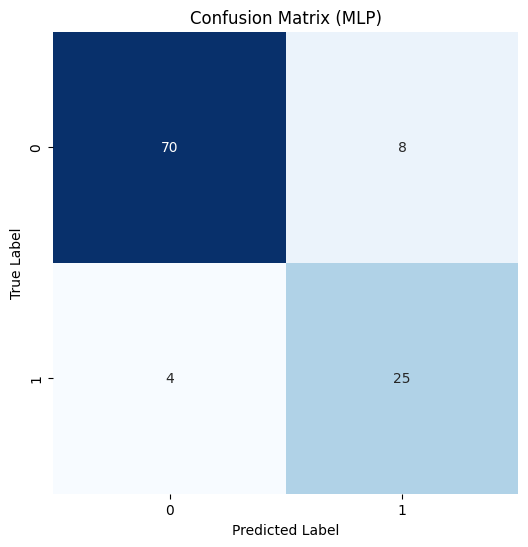

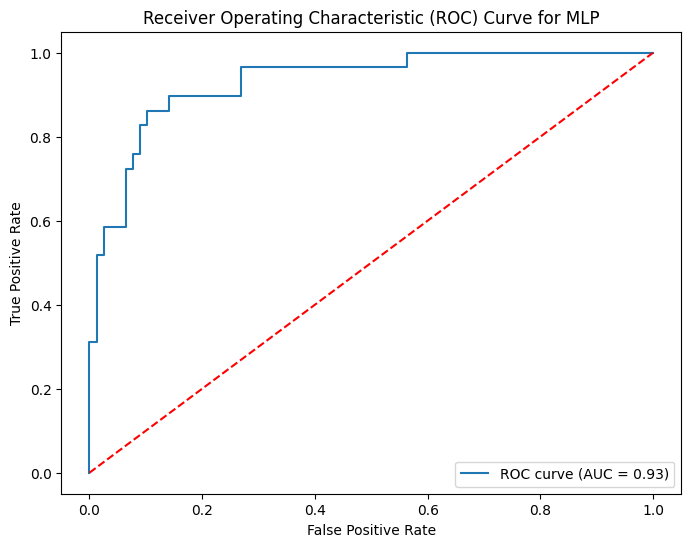

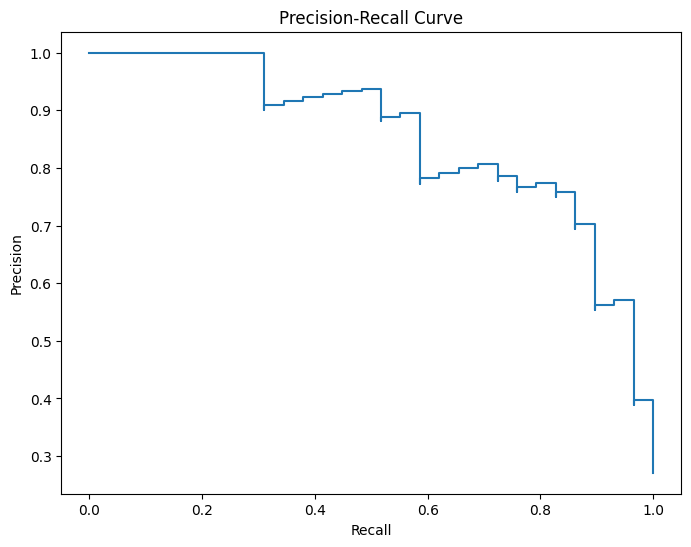

In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP)')
plt.show()

# Calculate ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
